In [ ]:
import os
import pandas as pd

DATA_PATH = "C:\\Users\\as22107\\Downloads\\Stress-Predict-Dataset-main\\Raw_data"
SAVE_PATH = "C:\\Users\\as22107\\Downloads\\Stress-Predict-Dataset-main\\processed_data2"
os.mkdir(SAVE_PATH)


final_columns = {
    'ACC': ['id', 'X', 'Y', 'Z', 'datetime'],
    'EDA': ['id', 'EDA', 'datetime'],
    'HR': ['id', 'HR', 'datetime'],
    'TEMP': ['id', 'TEMP', 'datetime'],
}

names = {
    'ACC.csv': ['X', 'Y', 'Z'],
    'BVP.csv':['BVP'],
    'EDA.csv': ['EDA'],
    'HR.csv': ['HR'],
    'TEMP.csv': ['TEMP'],
}

desired_signals = ['ACC.csv', 'EDA.csv', 'HR.csv', 'TEMP.csv']
desired_signals = ['ACC.csv', 'EDA.csv', 'HR.csv','TEMP.csv']

acc = pd.DataFrame(columns=final_columns['ACC'])
eda = pd.DataFrame(columns=final_columns['EDA'])
hr = pd.DataFrame(columns=final_columns['HR'])
temp = pd.DataFrame(columns=final_columns['TEMP'])

def process_df(df, file):
    start_timestamp = df.iloc[0,0]
    sample_rate = df.iloc[1,0]
    new_df = pd.DataFrame(df.iloc[2:].values, columns=df.columns)
    new_df['id'] =  file[-2:]
    new_df['datetime'] = [(start_timestamp + i/sample_rate) for i in range(len(new_df))]
    return new_df

for file in os.listdir(DATA_PATH):
    print(f'Processing {file}')
    for sub_file in os.listdir(os.path.join(DATA_PATH, file)):
        if not sub_file.endswith(".zip"):
            for signal in os.listdir(os.path.join(DATA_PATH, file)):
                if signal in desired_signals:
                    df = pd.read_csv(os.path.join(DATA_PATH, file,  signal), names=names[signal], header=None)
                    if not df.empty:
                        if signal == 'ACC.csv':
                            acc = pd.concat([acc, process_df(df, file)])   
                       
                        if signal == 'EDA.csv':
                            eda = pd.concat([eda, process_df(df, file)])
                        if signal == 'HR.csv':
                            hr = pd.concat([hr, process_df(df, file)])
                        if signal == 'TEMP.csv':
                            temp = pd.concat([temp, process_df(df, file)])

print('Saving Data ...')
acc.to_csv(os.path.join(SAVE_PATH, 'combined_acc.csv'), index=False)
eda.to_csv(os.path.join(SAVE_PATH, 'combined_eda.csv'), index=False)
hr.to_csv(os.path.join(SAVE_PATH, 'combined_hr.csv'), index=False)
temp.to_csv(os.path.join(SAVE_PATH, 'combined_temp.csv'), index=False)
print('done')

In [1]:
import glob
import pandas as pd

In [2]:
data= pd.concat([pd.read_csv(filename)
                for filename in glob.glob(r'C:\Users\as22107\Downloads\Stress-Predict-Dataset-main\processed_data2/combined_acc.csv')])
   #combined all acc data  

In [3]:
data1= pd.concat([pd.read_csv(filename)
                for filename in glob.glob(r'C:\Users\as22107\Downloads\Stress-Predict-Dataset-main\processed_data2/combined_hr.csv')])
   #combined all acc data  

In [4]:
data2= pd.concat([pd.read_csv(filename)
                for filename in glob.glob(r'C:\Users\as22107\Downloads\Stress-Predict-Dataset-main\processed_data2/combined_eda.csv')])
   #combined all acc data  

In [5]:
data3= pd.concat([pd.read_csv(filename)
                for filename in glob.glob(r'C:\Users\as22107\Downloads\Stress-Predict-Dataset-main\processed_data2/combined_temp.csv')])
   #combined all acc data  

In [6]:
data3=data3.iloc[:15000,]

In [7]:
import pandas as pd

# Merge dataframes based on a common column
merged = pd.merge(data, data1)
merged = pd.merge(merged, data2)
merged = pd.merge(merged, data3)

# Save merged dataframe to a CSV file
merged.to_csv('merged.csv', index=False)

In [8]:
merged

,id,X,Y,Z,datetime,HR,EDA,TEMP
0,1,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
1,1,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
2,1,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
3,1,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
4,1,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
...,...,...,...,...,...,...,...,...
1906683,1,-82.0,23.0,0.0,1.644229e+09,83.28,0.020500,28.33
1906684,1,-82.0,23.0,0.0,1.644229e+09,83.28,0.020500,28.33
1906685,1,-82.0,23.0,0.0,1.644229e+09,83.28,0.020500,28.33
1906686,1,-82.0,23.0,0.0,1.644229e+09,83.28,0.020500,28.33


In [10]:
new= merged.drop('id', axis=1)

In [11]:
new

,X,Y,Z,datetime,HR,EDA,TEMP
0,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
1,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
2,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
3,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
4,-16.0,-14.0,59.0,1.644226e+09,83.00,0.169126,28.39
...,...,...,...,...,...,...,...
1906683,-82.0,23.0,0.0,1.644229e+09,83.28,0.020500,28.33
1906684,-82.0,23.0,0.0,1.644229e+09,83.28,0.020500,28.33
1906685,-82.0,23.0,0.0,1.644229e+09,83.28,0.020500,28.33
1906686,-82.0,23.0,0.0,1.644229e+09,83.28,0.020500,28.33


In [24]:
new1= new.drop('datetime', axis=1)

In [25]:
new1= new1.drop('X', axis=1)

In [26]:
new1= new1.drop('Y', axis=1)

In [27]:
new1= new1.drop('Z', axis=1)

In [28]:
new1.to_csv('merged.csv', index=False)

In [29]:
new1

,HR,EDA,TEMP
0,83.00,0.169126,28.39
1,83.00,0.169126,28.39
2,83.00,0.169126,28.39
3,83.00,0.169126,28.39
4,83.00,0.169126,28.39
...,...,...,...
1906683,83.28,0.020500,28.33
1906684,83.28,0.020500,28.33
1906685,83.28,0.020500,28.33
1906686,83.28,0.020500,28.33


middle    1423872
Higher     244736
lower      238080
Name: label, dtype: int64


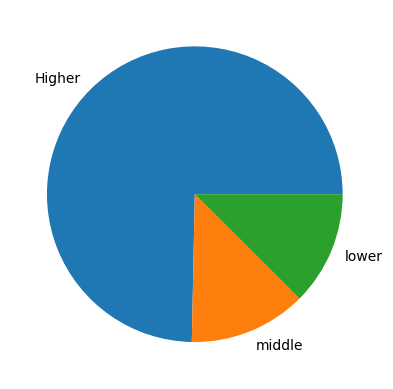

In [32]:
import pandas as pd
import numpy as np

# load the data into a pandas dataframe
data = pd.read_csv('merged.csv')

# define the criteria for labeling the data
mean_value = data['HR'].mean()
std_value = data['HR'].std()

# create a new column for labels
data['label'] = ''

# label the data using decision-making techniques
for i, column in data.iterrows():
    if column['HR'] >= mean_value + std_value:
        data.loc[i, 'label'] = 'Higher'
    elif column['HR'] <= mean_value - std_value:
        data.loc[i, 'label'] = 'lower'
    else:
        data.loc[i, 'label'] = 'middle'

# save the labeled data to a new file
data.to_csv('labeled_data.csv', index=False)

# print the distribution of labels
print(data['label'].value_counts())

# plot the distribution of labels
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=data['label'].unique())
plt.show()

In [35]:
import pandas as pd
df = pd.read_csv("Downloads\labeled_data.csv")

# data visualization


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906688 entries, 0 to 1906687
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   HR      float64
 1   EDA     float64
 2   TEMP    float64
 3   label   object 
dtypes: float64(3), object(1)
memory usage: 58.2+ MB


In [37]:
df.dtypes

HR       float64
EDA      float64
TEMP     float64
label     object
dtype: object

In [38]:
df.isnull().sum()

HR       0
EDA      0
TEMP     0
label    0
dtype: int64

In [40]:
df.HR=pd.to_datetime(df['HR'])

In [41]:
df.HR.min(),df.HR.max()

(Timestamp('1970-01-01 00:00:00.000000053'),
 Timestamp('1970-01-01 00:00:00.000000121'))

Let's compute the amount of days between the limits in the table

In [43]:
df.HR.max()-df.HR.min()

Timedelta('0 days 00:00:00.000000068')

In [44]:
df.head()

,HR,EDA,TEMP,label
0,1970-01-01 00:00:00.000000083,0.169126,28.39,Higher
1,1970-01-01 00:00:00.000000083,0.169126,28.39,Higher
2,1970-01-01 00:00:00.000000083,0.169126,28.39,Higher
3,1970-01-01 00:00:00.000000083,0.169126,28.39,Higher
4,1970-01-01 00:00:00.000000083,0.169126,28.39,Higher


In [ ]:
df = df.dropna()

<AxesSubplot:>

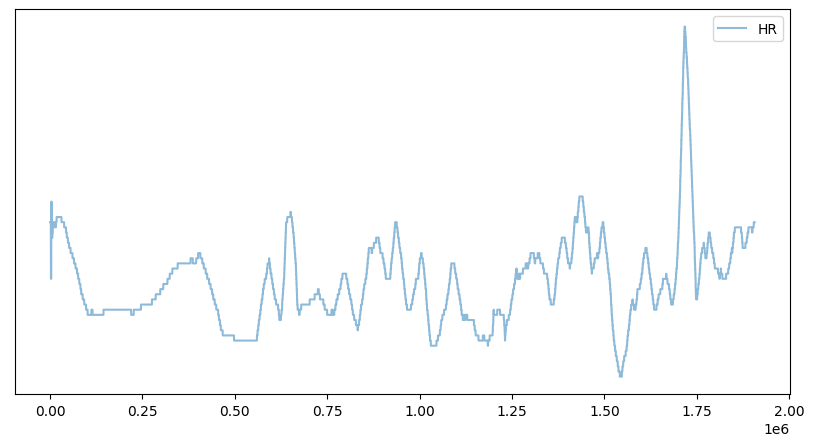

In [45]:
df[['HR']].plot(figsize = (10, 5), alpha = 0.5)

# evaluate stationary


array([[<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'EDA'}>],
       [<AxesSubplot:title={'center':'TEMP'}>, <AxesSubplot:>]],
      dtype=object)

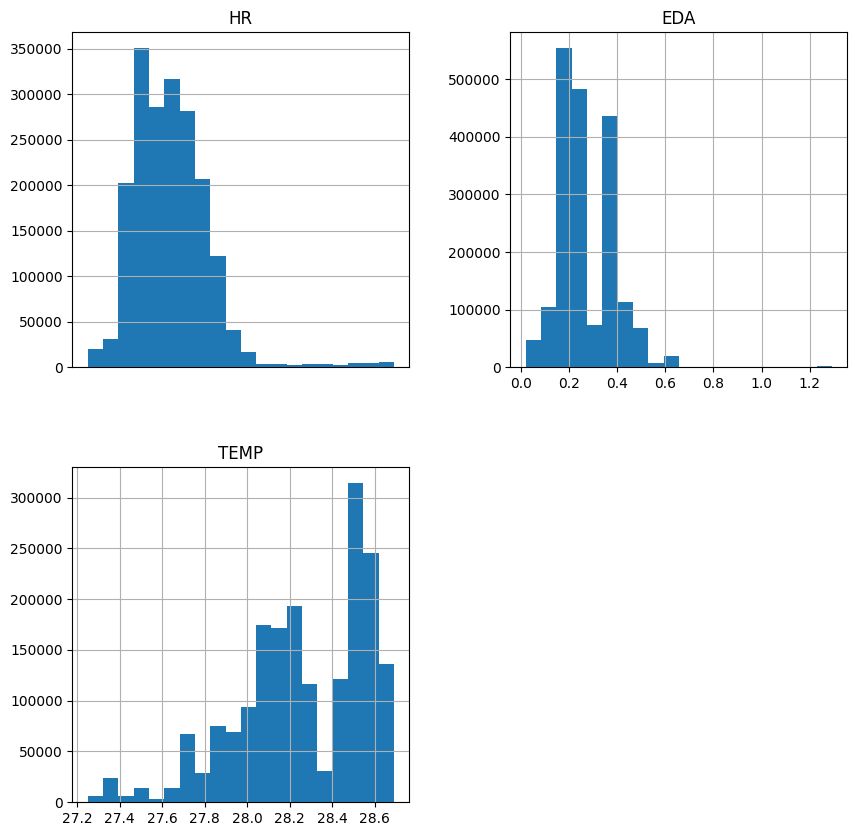

In [46]:
df.hist(bins=20,figsize=(10,10))

We can't assume a uniform nor normal distribution in the plot above,
because of that the statistical summary can helps us more, 
for this we will split the data into 10 chunks and compute mean and variance of each one.

In [47]:
import numpy as np
np.round(df.shape[0]/10,0)

190669.0

In [48]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df['HR'].iloc[(i*28748):(i*28748)+28748].mean())
    std.append(df['HR'].iloc[(i*28748):(i*28748)+28748].std())

In [49]:
mean

[Timestamp('1970-01-01 00:00:00.000000082'),
 Timestamp('1970-01-01 00:00:00.000000080'),
 Timestamp('1970-01-01 00:00:00.000000073'),
 Timestamp('1970-01-01 00:00:00.000000066'),
 Timestamp('1970-01-01 00:00:00.000000065'),
 Timestamp('1970-01-01 00:00:00.000000065'),
 Timestamp('1970-01-01 00:00:00.000000066'),
 Timestamp('1970-01-01 00:00:00.000000065'),
 Timestamp('1970-01-01 00:00:00.000000066'),
 Timestamp('1970-01-01 00:00:00.000000067')]

In [50]:
std

[Timedelta('0 days 00:00:00.000000002'),
 Timedelta('0 days 00:00:00.000000002'),
 Timedelta('0 days 00:00:00.000000002'),
 Timedelta('0 days 00:00:00.000000001'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:00:00')]

In [51]:
new=pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

In [52]:
new = new.dropna()

# print the resulting dataframe
print(new)

                           mean                       std
0 1970-01-01 00:00:00.000000082 0 days 00:00:00.000000002
1 1970-01-01 00:00:00.000000080 0 days 00:00:00.000000002
2 1970-01-01 00:00:00.000000073 0 days 00:00:00.000000002
3 1970-01-01 00:00:00.000000066 0 days 00:00:00.000000001
4 1970-01-01 00:00:00.000000065           0 days 00:00:00
5 1970-01-01 00:00:00.000000065           0 days 00:00:00
6 1970-01-01 00:00:00.000000066           0 days 00:00:00
7 1970-01-01 00:00:00.000000065           0 days 00:00:00
8 1970-01-01 00:00:00.000000066           0 days 00:00:00
9 1970-01-01 00:00:00.000000067           0 days 00:00:00


Above we see how both measures are clearly different in each chunk. However looking at the plot we could assume a constant variance as the ripple in the curve, but without a doubt trend is the most outstanding feature. Until now can assume it's a non-stationary serie, but to know more about it we will evaluate two other methods.
Seasonal decomposition is a function from statsmodels library which allows us to decompose the serie into trend, seasonal and residual, either additive or multiplicative:

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

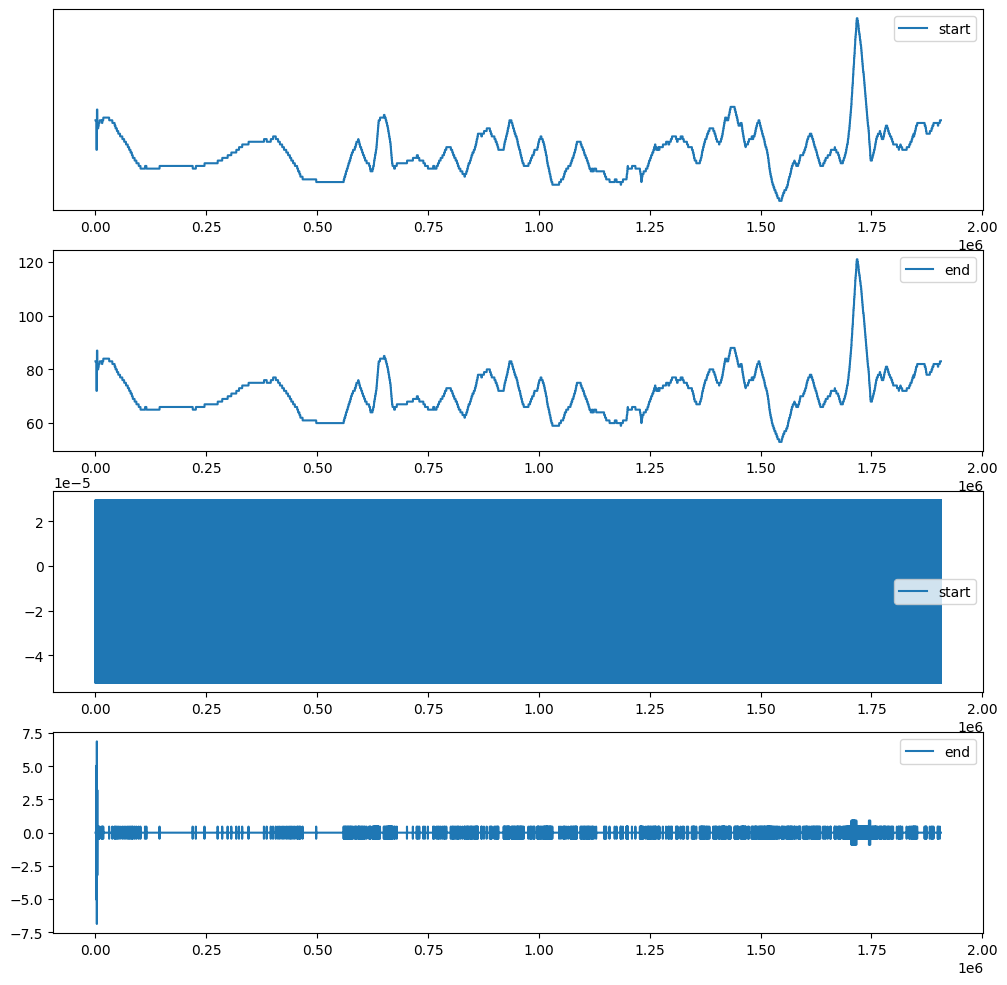

In [56]:
decompose_add=seasonal_decompose(df['HR'], model='additive', period=12)
plt.figure(figsize=(12,12))
plt.subplot(411)
plt.plot(df['HR'], label='start')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='end')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='start')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='end')
plt.legend(loc='best')

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

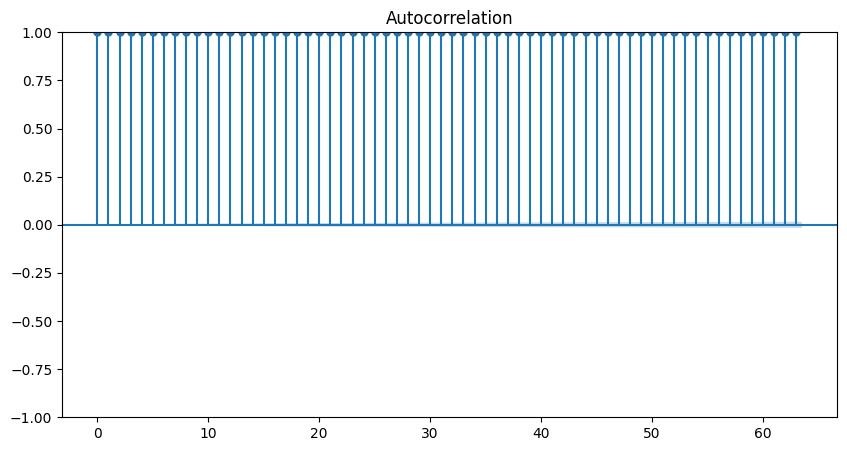

In [58]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['HR'])
print()

C:\Users\as22107\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


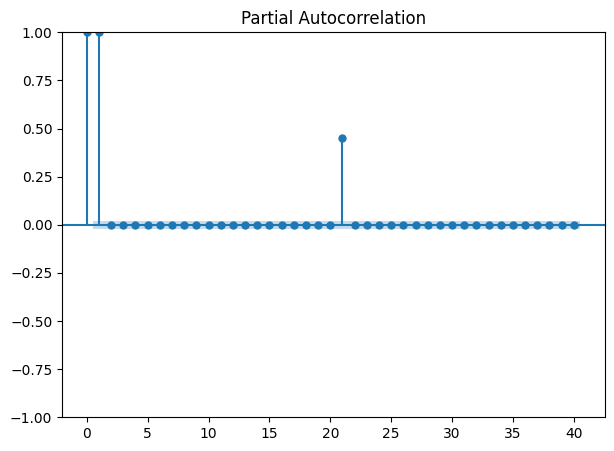

In [103]:
plt.rc("figure", figsize=(7,5))
plot_pacf(df['HR'])
print()

In [59]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
HR=HR.iloc[:15000,]

In [60]:
result = adfuller(df['HR'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


MemoryError: Unable to allocate 1.14 GiB for an array with shape (80, 1906545) and data type float64

# ------------------------------------------------------------------------------------------------------------

modeling

In [64]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['HR']
y = df['EDA']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [65]:
from keras.optimizers import Adam
import statistics
import seaborn as sns

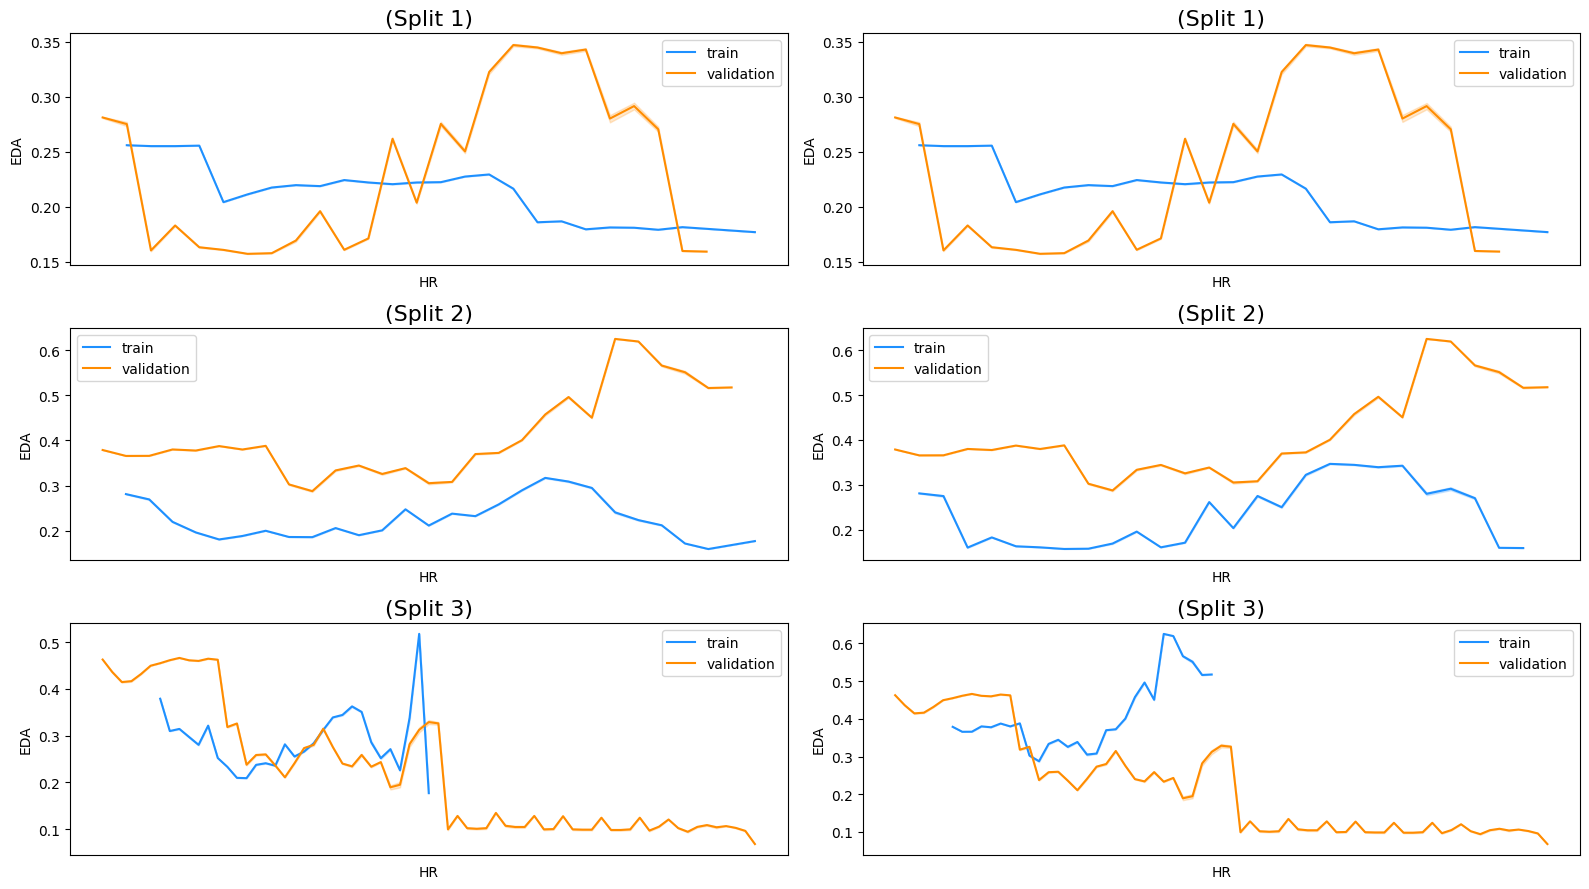

In [66]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"(Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"(Split {i+1})", fontsize=16)


    
plt.tight_layout()
plt.show()

In [73]:
df = df.dropna()

**Models for Univariate Time Series

First of all, we are going to analize univariate TimeSeries forecasting.

In [74]:
train_size = int(0.85 * len(df))
test_size = len(df) - train_size

univariate_df = df[['HR', 'EDA']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

1620684 286004


In [68]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [75]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-15616476.848, Time=84.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=769206.289, Time=29.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=59.31 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=72.17 sec


LinAlgError: Array must not contain infs or NaNs

In [ ]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
#LSTM

In [70]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.88232454],
       [-0.88232454],
       [-0.88232454],
       [-0.88232454],
       [-0.88232454],
       [-0.88232454],
       [-0.88232454],
       [-0.88232454],
       [-0.88232454],
       [-0.88232454]])

In [71]:
# Defines the rolling window
look_back = 52
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

1620580 286004


In [72]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))

model.summary()

Epoch 1/5
1620580/1620580 [==============================] - 2247s 1ms/step - loss: 2.3359e-05 - val_loss: 1.9909e-06
Epoch 2/5
1620580/1620580 [==============================] - 2258s 1ms/step - loss: 9.4202e-06 - val_loss: 1.6536e-06
Epoch 3/5
1620580/1620580 [==============================] - 2278s 1ms/step - loss: 8.2895e-06 - val_loss: 1.4612e-06
Epoch 4/5
1620580/1620580 [==============================] - 2335s 1ms/step - loss: 8.1937e-06 - val_loss: 2.2896e-06
Epoch 5/5
1620580/1620580 [==============================] - 2367s 1ms/step - loss: 7.9307e-06 - val_loss: 1.8415e-06
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            92672     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                            

#Models for Multivariate Time Series